## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [4]:
df = pd.read_csv("QueryResults.csv",names=["DATE","TAG","POSTS"]).dropna()
df.head(15)

,DATE,TAG,POSTS
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,javascript,162.0
4,2008-08-01 00:00:00,c,85.0
5,2008-08-01 00:00:00,python,124.0
6,2008-08-01 00:00:00,perl,28.0
7,2008-08-01 00:00:00,c#,511.0
8,2008-08-01 00:00:00,c++,164.0
9,2008-08-01 00:00:00,java,222.0
10,2008-08-01 00:00:00,delphi,14.0


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [5]:
df.tail()
df.head()

,DATE,TAG,POSTS
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,javascript,162.0
4,2008-08-01 00:00:00,c,85.0
5,2008-08-01 00:00:00,python,124.0


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [6]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [7]:
column_labels = df.columns
print(column_labels)
df["DATE"].count()
df["TAG"].count()
df["POSTS"].count()

Index(['DATE', 'TAG', 'POSTS'], dtype='object')


np.int64(1991)

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [8]:
pd.options.display.float_format = "{:,.0f}".format
df.groupby("TAG")["POSTS"].sum().sort_values(ascending=False)

TAG
javascript   2,056,510
java         1,696,403
python       1,496,210
c#           1,423,530
php          1,361,988
c++            684,210
r              356,799
c              336,042
swift          273,055
ruby           214,582
perl            65,286
go              47,499
delphi          46,212
assembly        34,852
Name: POSTS, dtype: float64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [10]:
df.groupby("TAG")["DATE"].count().sort_values(ascending=False)

TAG
c#            145
assembly      144
c             144
c++           144
delphi        144
java          144
python        144
javascript    144
perl          144
php           144
ruby          144
r             142
swift         135
go            129
Name: DATE, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
df["DATE"] = pd.to_datetime(df["DATE"])

## Data Manipulation



In [13]:
reshaped_df = df.pivot(index="DATE",columns="TAG",values="POSTS")
reshaped_df.fillna(0,inplace=True)
reshaped_df.isna().values.any()
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0,0,3,0,0,0,0,0,0,0,0,0,0,0
2008-08-01,8,85,511,164,14,0,222,162,28,161,124,0,73,0
2008-09-01,28,321,"1,649",755,105,0,"1,137",640,131,482,542,6,290,0
2008-10-01,15,303,"1,989",811,112,0,"1,153",725,127,617,510,0,249,0
2008-11-01,17,259,"1,730",735,141,0,958,579,97,504,452,1,160,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317,"2,670","8,954","5,107",181,719,"13,253","20,483",215,"6,672","26,673","5,761",780,"3,434"
2020-04-01,406,"3,472","10,042","6,820",250,887,"15,377","24,634",240,"8,060","32,605","7,047",860,"4,015"
2020-05-01,386,"3,602","9,923","7,063",221,826,"14,711","25,196",228,"7,917","34,478","6,833",774,"4,066"


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [11]:
reshaped_df["java"].max()

np.float64(22109.0)

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

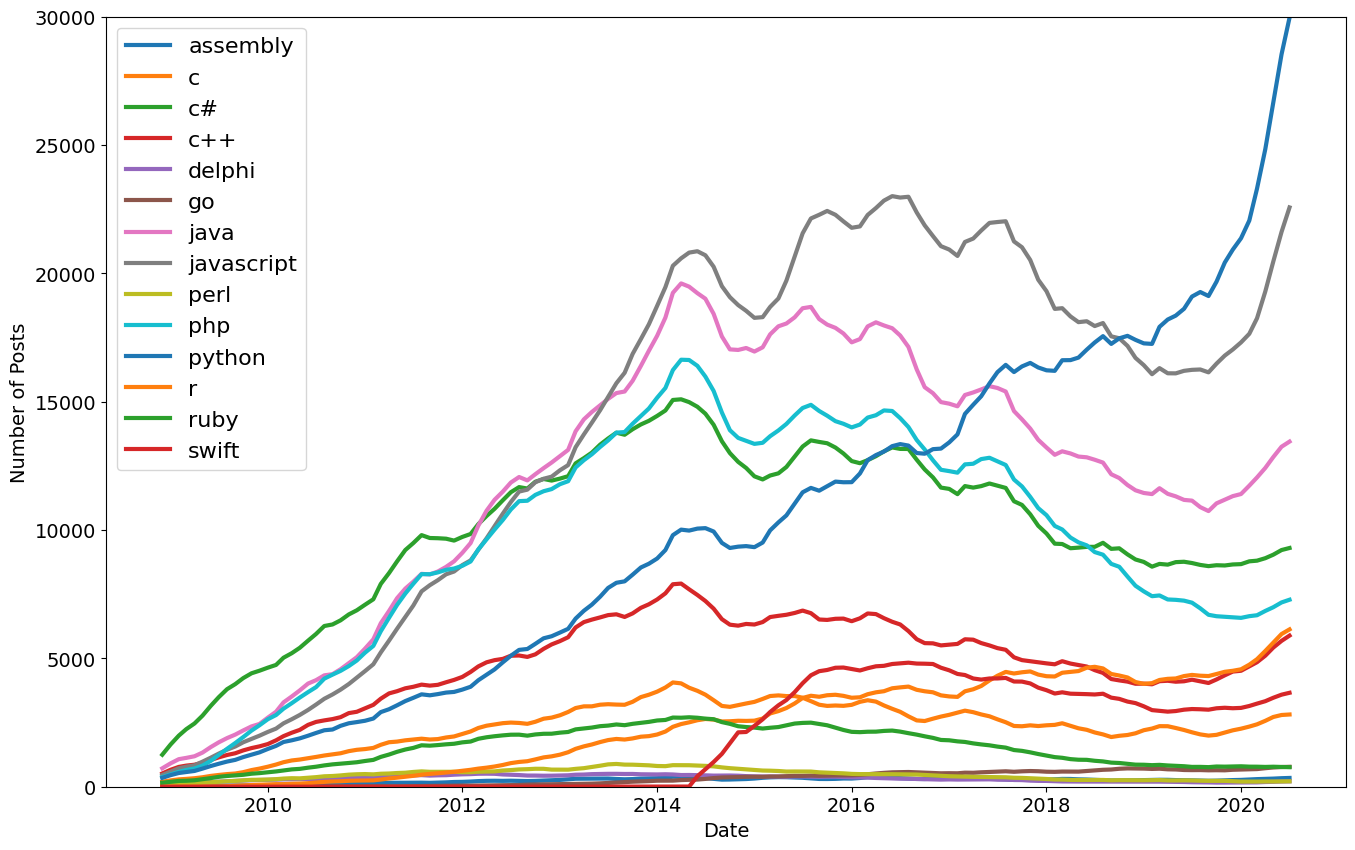

In [31]:
roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,30000)
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=column)
plt.legend(fontsize=16)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [32]:
#unrelated
reshaped_df["DATE"]

KeyError: 'DATE'